<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/Pr%C3%A1ctica1_SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones

## Funciones auxiliares

In [ ]:
import matplotlib.pyplot as plt
from math import fabs
import numpy as np

def graficar(f,a,b,num=100):
    '''
    función para graficar una función <f> en un intervalo [a,b]. El parámetro <num>
    controla la "resolución" de la gráfica. Puede no especificarse.
    '''
    eje_x = np.linspace(start=a,
                    stop=b,
                    num=num)
    eje_y = [f(x) for x in eje_x]  # Listas de compresión
    plt.figure(figsize=(7,5))
    plt.plot(eje_x,eje_y,color='red')
    plt.axhline(0,color='gray') # Dibujar eje X
    plt.show()

def error_relativo(x_real,x_aprox):
    return fabs(x_real-x_aprox)/fabs(x_real)

Funciones que implementen el método de la bisección y la falsa posición

In [ ]:
def biseccion(f,xl,xu,tol):
    x_m = xl
    error = 2*tol
    n_iteraciones = 0
    while (error>tol):
        n_iteraciones += 1
        x_m_old = x_m
        x_m = (xl+xu)/2
        if x_m != 0:
            error = error_relativo(x_m,x_m_old)
        test = f(xl)*f(x_m)
        if test<0:
            xu = x_m
        elif test>0:
            xl = x_m
        else:
            error = 0
    return {'raiz': x_m,
            'error': error,
            'iteraciones': n_iteraciones
            }


def falsa_posicion(f,xl,xu,tol):
    x_m = xl
    error = 2*tol
    n_iteraciones = 0
    while (error>tol):
        n_iteraciones += 1
        x_m_old = x_m
        x_m = xu - (f(xu)*(xl-xu))/(f(xl)-f(xu))
        if x_m != 0:
            error = error_relativo(x_m,x_m_old)
        test = f(xl)*f(x_m)
        if test<0:
            xu = x_m
        elif test>0:
            xl = x_m
        else:
            error = 0
    return {'raiz': x_m,
            'error': error,
            'iteraciones': n_iteraciones
            }

Considera la siguiente implementación del método de Newton

In [ ]:
def newton(f,df,x0,tol):
    error = 2*tol
    n_iteraciones = 0
    while (error>tol):
        n_iteraciones += 1
        x0_anterior = x0
        x0 = x0 - f(x0)/df(x0)
        # print(x0) # Imprimir la aproximación actual para inspeccionar la convergencia
        if x0 != 0:
            error = error_relativo(x0,x0_anterior)
    return {'raiz': x0,
            'error': error,
            'iteraciones': n_iteraciones
            }

# Ejercicio 1

Considerar la ecuación

$$x^{10}=0.8$$

Usando los métodos de la bisección y falsa posición, encuentra una solución a esta ecuación con una tolerancia de 0.001%.

1. Define la función y grafica

2. Encuentra la raiz de la función usando cada uno de los dos métodos (bisección y falsa posición)

3. ¿Cuál fue el método que necesitó menos iteraciones?

In [ ]:
def f(x):
    return x**10-0.8

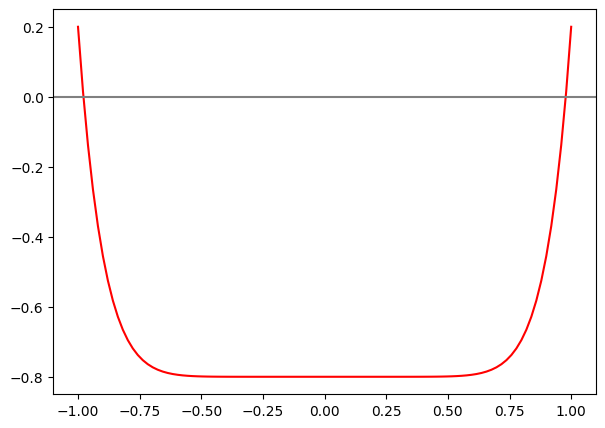

In [ ]:
graficar(f,-1,1)

In [ ]:
biseccion(f,0,1,0.00001)

{'raiz': 0.9779281616210938, 'error': 7.80158996403467e-06, 'iteraciones': 17}

In [ ]:
falsa_posicion(f,0,1,0.00001)

{'raiz': 0.9779325603602953, 'error': 1.9729053326387938e-06, 'iteraciones': 7}

# Ejercicio 2

Calcula el valor de $\pi$ con una tolerancia de 0.0001%. Para esto, encuentra la solución a la ecuación

$$\cos\left(\frac{x}{2}\right)=0$$

Usa el método que prefieras y escoge los valores iniciales de tu elección de manera que obtengas, como solución, $\pi$.

¿Cuántos dígitos correctos de $\pi$ obtuviste?




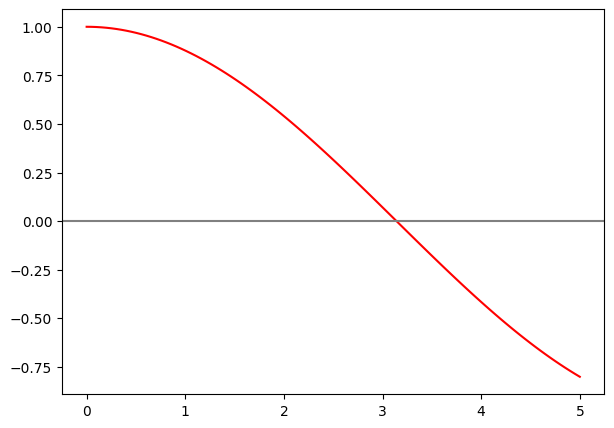

In [ ]:
from math import cos

def f(x):
    return cos(x/2)

graficar(f,0,5)

In [ ]:
falsa_posicion(f,0,5,0.000001)

{'raiz': 3.141592653589793, 'error': 6.161495630748596e-09, 'iteraciones': 5}

# Ejercicio 3:

En este ejemplo no tendremos convergencia usando el método de Newton, estaremos atrapados en un ciclo de longitud 2. Considera la función

$$f(x)=\begin{cases}
\sqrt{x}, & x\geq 0 \\
-\sqrt{-x}, & x< 0 \\
\end{cases}
$$




La derivada es

$$f(x)=\begin{cases}
\frac{1}{2\sqrt{x}}, & x\geq 0 \\
\frac{1}{2\sqrt{-x}}, & x< 0 \\
\end{cases}
$$

Define la función y su derivada

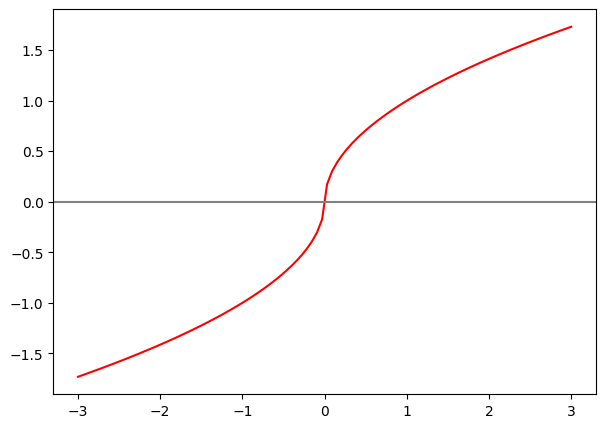

In [ ]:
from math import sqrt

def f(x):
    if x>=0:
        y = sqrt(x)
    else:
        y = -sqrt(-x)
    return y

def df(x):
    if x>=0:
        y = 1/(2*sqrt(x))
    else:
        y = 1/(2*sqrt(-x))
    return y

1. Grafica la función

In [ ]:
graficar(f,-3,3)

{'raiz': 0.0, 'error': 0, 'iteraciones': 1}

2. Encuentra la raiz usando el método de la bisección o falsa posición.

In [ ]:
falsa_posicion(f,-1,1,0.000001)

3. Ahora, usa el método de Newton. Activa la opción de imprimir las iteraciones para que puedas ver qué está sucediendo.

In [ ]:
newton(f,df,1,0.000001)

# Ejercicio 4

Encuentra las raíces de la función

$$f(x)=\frac{1-x^2}{2(1+x^2)}.$$

La derivada es

$$f'(x) = -\frac{2 x}{(1 + x^2)^2}$$


0. Define la función y derivada

In [ ]:
def f(x):
    return (1-x**2)/(2*(1+x**2))

def df(x):
    return -(2*x)/(1+x**2)**2

1. Verifica, manualmente, que las raíces son -1 y 1.

2. Grafica la función

In [ ]:
graficar(f,-3,3)

2. Ahora usa el método de la bisección o falsa posición. Encuentra ambas raíces.

In [ ]:
biseccion(f,0,1,0.00001)

{'raiz': 0.9999923706054688, 'error': 7.629452739355006e-06, 'iteraciones': 17}

3. Ahora prueba con el método de Newton, usa

* Aproximación inicial $x_0=2$, ¿a cuál raiz debería converger?
* Aproximación inicial $x_0=-2$, ¿a cuál raiz debería converger?

In [ ]:
newton(f,df,-2,0.00001)

-0.125
-2.12451171875
0.1550866732773315
1.7661559646127334
0.5304106995764162
0.9644377334492932
0.9993905645446058
0.999999814407423
0.9999999999999828


{'raiz': 0.9999999999999828, 'error': 1.855925597649165e-07, 'iteraciones': 9}

# Lo que aprendemos de todo esto

Los métodos cerrados (bisección y falsa posición) son métodos que siempre convergen, aunque lo hacen lentamente. Los métodos abiertos (Newton, Secante y Punto fijo) suelen tener una convergencia más rápida, sin embargo, no siempre convergen o no siempre producen el resultado que buscamos.